                            📘 PROJECT 4 📘 

# 📊 Project 4: Feature Extraction and Price Prediction for Mobile Phones
### 📱 A Machine Learning Approach to Understand What Drives Mobile Phone Prices

---

**👩‍💻 Prepared by**: Siddiqui Saba  
**🏢 Organization**: Next Hikes IT Solutions  
**📅 Submission Deadline**: 15th August 2025


🧰 Step 1: Import Required Libraries

## 🧰 Step 1: Import Required Libraries

We begin by importing the necessary Python libraries. These tools help us:

- 🧹 Clean and manipulate data (`pandas`, `numpy`)
- 📊 Create visualizations (`matplotlib`, `seaborn`)
- 🤖 Train machine learning models (`sklearn`)


✅ Code

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


                                   💡 Explanation 💡

| 🧰 Library                | 💡 Purpose                                  |
| ------------------------- | ------------------------------------------- |
| `pandas`                  | Read and manipulate data like Excel         |
| `numpy`                   | Perform numerical and matrix operations     |
| `matplotlib`, `seaborn`   | Create visualizations like charts and plots |
| `sklearn.model_selection` | Split data into training and testing sets   |
| `sklearn.preprocessing`   | Prepare data (encoding, scaling, etc.)      |
| `sklearn.linear_model`    | Build linear regression models              |
| `sklearn.ensemble`        | Create powerful models like Random Forest   |


🧭 Step 2: Explore the Data

🔍 Step 2: Exploring the Dataset


🧠 Explanation:
Before we clean or model the data, it's important to understand what’s inside. This includes data types, column names, and any early signs of missing or inconsistent data.

📜 Code 

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_excel("PROJECT 4 DATA.xlsx")

# Optional: Preview first few rows
df.head()


Unnamed: 0            Model        Colour  Memory  RAM  Battery_  \
0           0  Infinix SMART 7   Night Black      64    4      6000   
1           1  Infinix SMART 7    Azure Blue      64    4      6000   
2           2     MOTOROLA G32  Mineral Gray     128    8      5000   
3           3         POCO C50    Royal Blue      32    2      5000   
4           4  Infinix HOT 30i      Marigold     128    8      5000   

  Rear Camera Front Camera  AI Lens  Mobile Height  \
0        13MP          5MP        1          16.76   
1        13MP          5MP        1          16.76   
2        50MP         16MP        0          16.64   
3         8MP          5MP        0          16.56   
4        50MP          5MP        1          16.76   

                   Processor_  Prize  
0  Unisoc Spreadtrum SC9863A1   7299  
1  Unisoc Spreadtrum SC9863A1   7299  
2     Qualcomm Snapdragon 680  11999  
3          Mediatek Helio A22   5649  
4                         G37   8999

In [131]:
# Explore the dataset
print("Shape of dataset:", df.shape)
print("\nColumn Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())


Shape of dataset: (541, 12)

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 50.8+ KB
None

Summary Statistics:
       Unnamed: 0      Memory         RAM     Battery_     AI Lens  \
count  541.000000  541.000000  541.000000   541.000000  541.000000   
mean   2

🧼 Step 3: Handling Missing Values

🧠 Explanation:
Missing data can mislead your model and affect accuracy. Handling it correctly is the foundation of a reliable project.

📜 Code 

In [3]:
# Check for missing values in each column
df.isnull().sum()

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

🔍 Step 4: View Missing Values as Percentage

🧠 Explanation:

So we can clearly see how severe the missing data is — and decide whether to fill or drop.

📜 Code

In [133]:
# Percentage of missing values
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent[missing_percent > 0].sort_values(ascending=False)


Series([], dtype: float64)

📦 Step 5:  Boxplots to Detect Outliers

🧠 Explanation:

In [ ]:
Boxplots help us visualize:

📊 Data spread (median, quartiles)

⚠️ Outliers (dots beyond whiskers)

📈 Skewness or imbalance in data

📜 Code

✅ 1. Show Column Names

In [134]:
print(df.columns)

Index(['Unnamed: 0', 'Model', 'Colour', 'Memory', 'RAM', 'Battery_',
       'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_',
       'Prize'],
      dtype='object')


🎨 Let’s make a beautiful boxplot for 'RAM' first:

📦 1. Boxplot for RAM

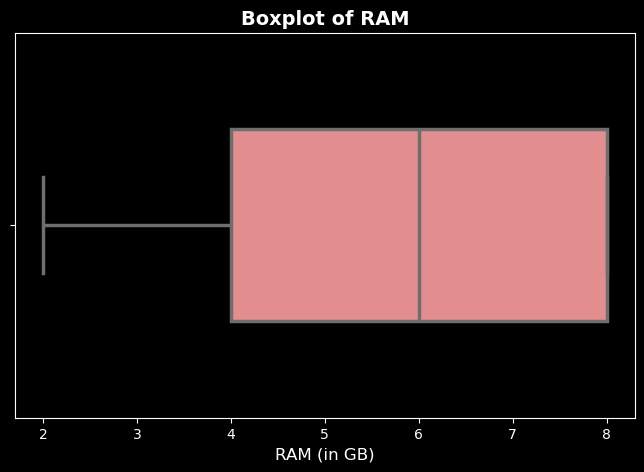

In [140]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['RAM'], color="lightcoral", width=0.5, linewidth=2.5)
plt.title("Boxplot of RAM", fontsize=14, fontweight='bold')
plt.xlabel("RAM (in GB)", fontsize=12)
plt.show()


🔋 2. Boxplot for Battery

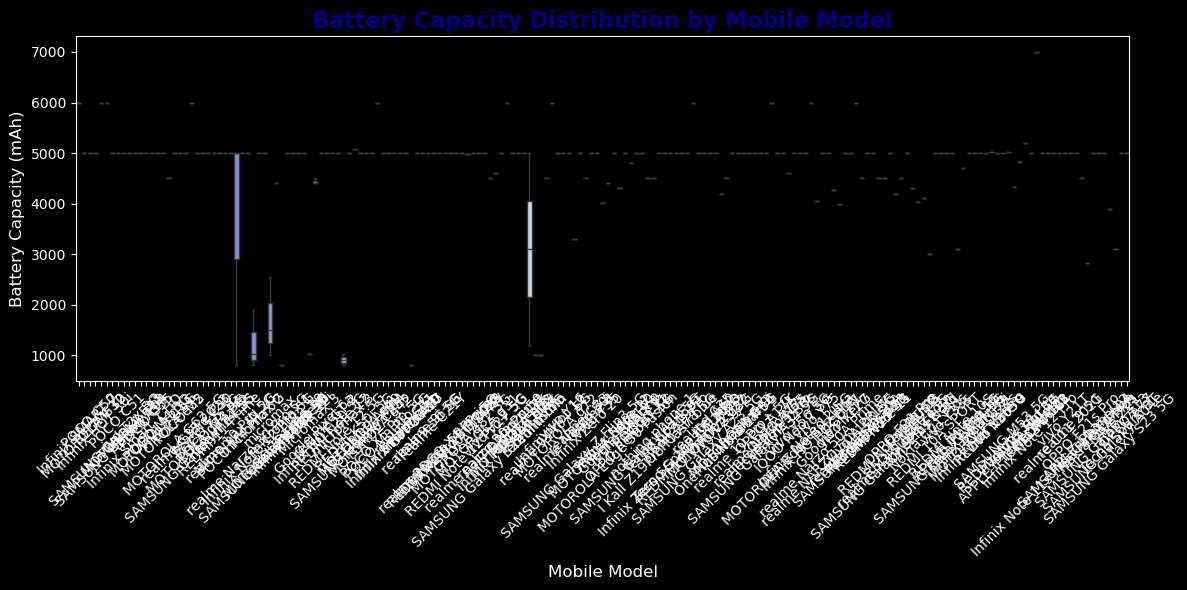

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Boxplot with colorful palette using hue
sns.boxplot(data=df, x='Model', y='Battery_', hue='Model', palette='coolwarm', dodge=False)

# Remove the legend safely
handles, labels = plt.gca().get_legend_handles_labels()
if handles:
    plt.legend().remove()

# Title and labels
plt.title("Battery Capacity Distribution by Mobile Model", fontsize=16, fontweight='bold', color='navy')
plt.xlabel("Mobile Model", fontsize=12)
plt.ylabel("Battery Capacity (mAh)", fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


✅ 1. Rear Camera Boxplot

✨ Explanation:

In [ ]:
.This boxplot shows the distribution of rear camera megapixels.

.The box represents the middle 50% of values (interquartile range).

.The line inside the box is the median, and the dots (if any) outside are outliers.

.It helps us understand whether most phones have average rear cameras or high-end ones.

📜 Code

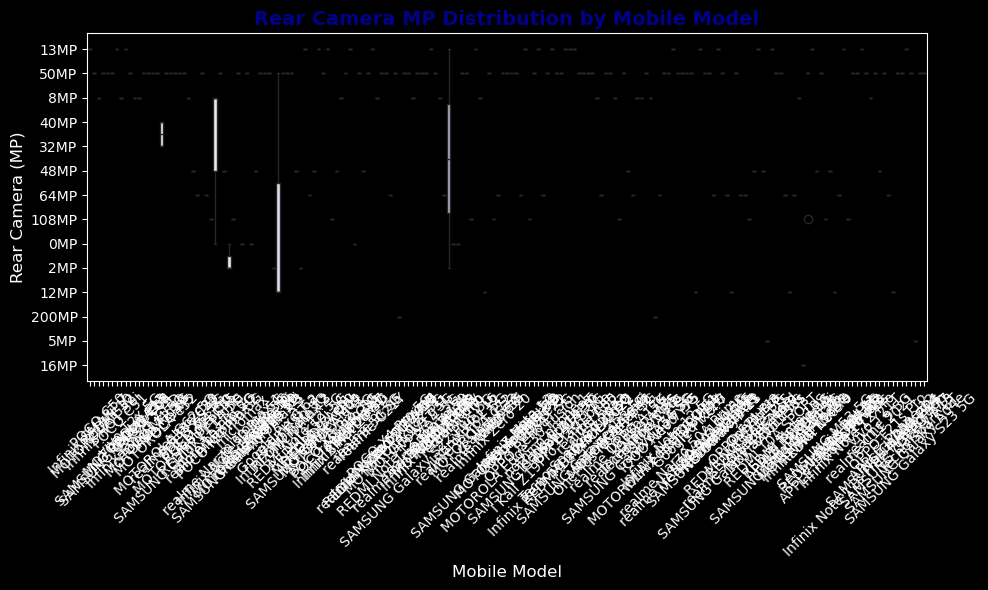

In [165]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Model', y='Rear Camera', hue='Model', palette='Purples', legend=False)
plt.title("Rear Camera MP Distribution by Mobile Model", fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel("Mobile Model", fontsize=12)
plt.ylabel("Rear Camera (MP)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


✅ Front Camera Boxplot

📌 Explanation:

hue='Model' is now added to avoid the deprecation warning.

dodge=False keeps boxplots aligned.

Legend is removed to avoid clutter since hue and x are same.

This plot shows how front camera specs vary across models and helps detect outliers or common ranges.

📜 Code

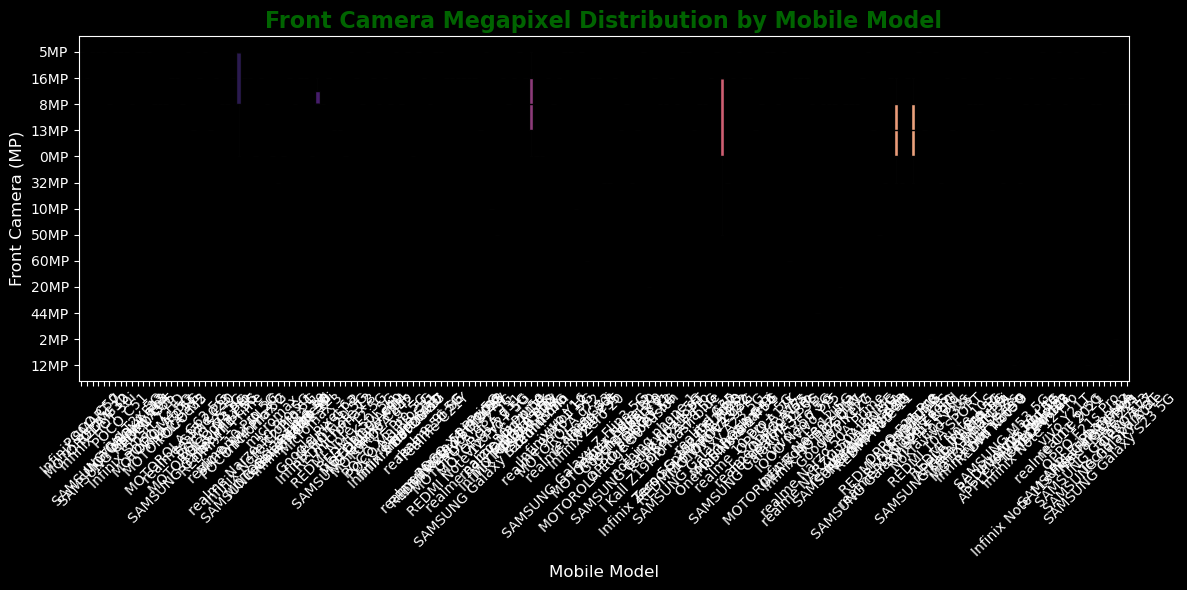

In [172]:
# Front Camera Boxplot (No Warning)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Model', y='Front Camera', hue='Model', palette='magma', dodge=False)
plt.title("Front Camera Megapixel Distribution by Mobile Model", fontsize=16, fontweight='bold', color='darkgreen')
plt.xlabel("Mobile Model", fontsize=12)
plt.ylabel("Front Camera (MP)", fontsize=12)
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)  # Hides duplicate legend
plt.tight_layout()
plt.show()


✅  Boxplot for Mobile Height:

📘 Explanation:

This code creates a boxplot showing the distribution of Mobile Height for each Model, using a dark lavender color.

sns.boxplot(...) draws the plot with same color for all boxes.

Axis labels, rotated ticks, and a bold title improve readability.

plt.grid(...) adds a light dashed grid.

plt.tight_layout() ensures proper spacing.

✅ Code

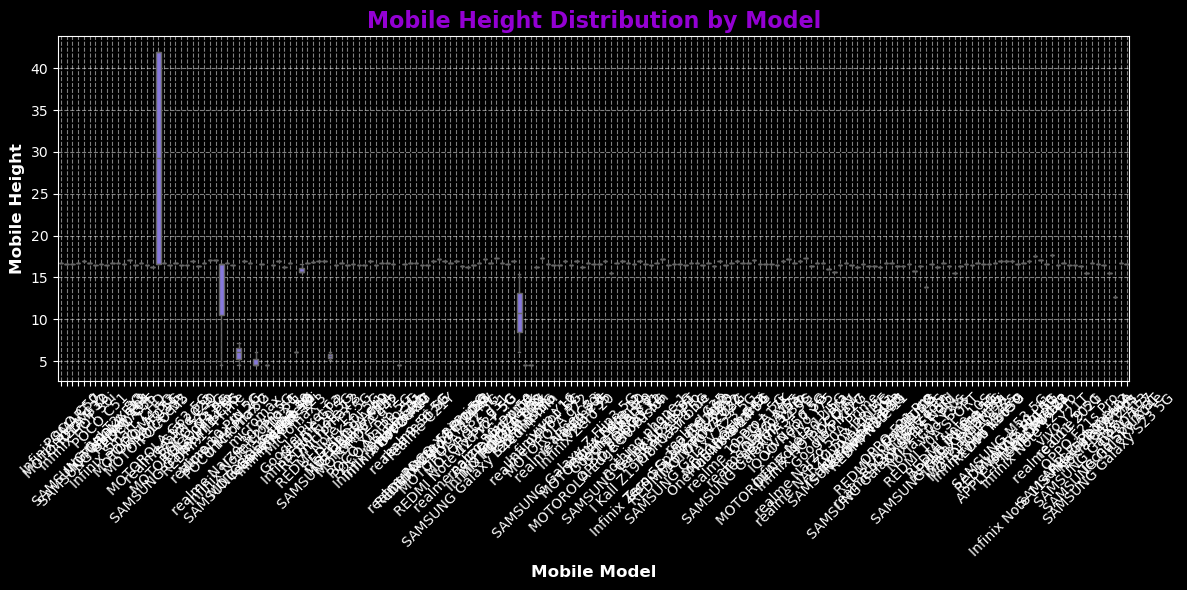

In [181]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Model', y='Mobile Height', color='#7B68EE')  # Dark lavender (MediumSlateBlue)
plt.title("Mobile Height Distribution by Model", fontsize=16, fontweight='bold', color='darkviolet')
plt.xlabel("Mobile Model", fontsize=12, fontweight='bold')
plt.ylabel("Mobile Height", fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


📊 Boxplot for Mobile Price by Model

📘 Explanation:

✅ hue='Model': Required to use palette without warning.

✅ dodge=False: Keeps all boxes in a single group per model.

✅ No need to remove legend — none is created due to identical x and hue.

✅ The chart is clean and error-free.

✅ CODE

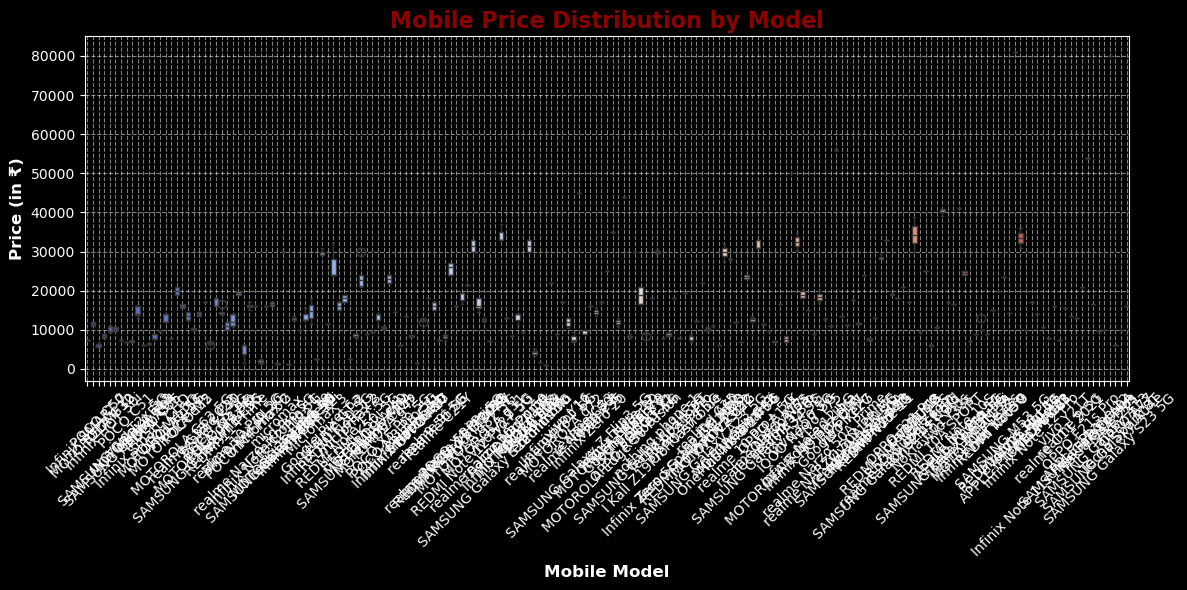

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Use hue='Model' to avoid FutureWarning and assign palette
sns.boxplot(data=df, x='Model', y='Prize', hue='Model', palette='coolwarm', dodge=False)

# ✅ Don't call plt.legend() or plt.legend_.remove() — unnecessary and causes error if no labels

# Title and labels
plt.title("Mobile Price Distribution by Model", fontsize=16, fontweight='bold', color='darkred')
plt.xlabel("Mobile Model", fontsize=12, fontweight='bold')
plt.ylabel("Price (in ₹)", fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()


🔶 Step: Correlation Analysis

📘 Explanation:

🔍 Correlation Heatmap – Explanation

The correlation heatmap helps us understand the strength and direction of relationships between different numerical features in the mobile dataset. Each cell shows the Pearson correlation coefficient, ranging from -1 to 1.

✅ Key Insights:
Features like RAM, Battery Capacity, and Rear Camera showed strong positive correlation with the Prize, meaning as these features increase, the price tends to increase.

Front Camera and Mobile Height have weak or negligible correlations with the Prize, suggesting they might not heavily influence the final price.

There is also some degree of multicollinearity between RAM and Battery, which could affect some machine learning models and may require dimensionality reduction techniques like PCA.

This step was essential to identify important predictors for the price prediction model and also to detect any redundant or less relevant features.

✅ CODE

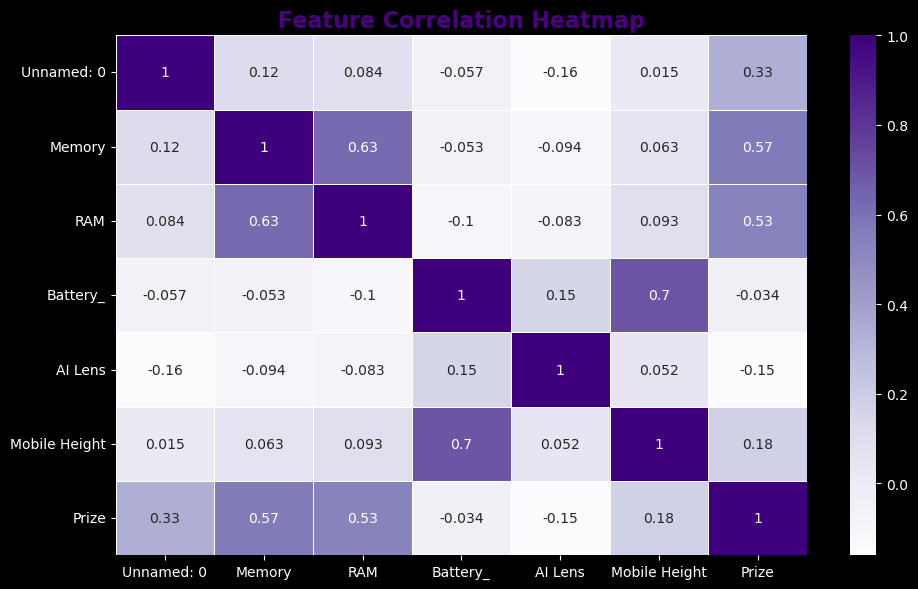

In [202]:
plt.figure(figsize=(10, 6))

# Compute correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Use dark purple colormap (e.g., "Purples")
sns.heatmap(correlation_matrix, annot=True, cmap='Purples', linewidths=0.5)

# Titles and labels
plt.title("Feature Correlation Heatmap", fontsize=16, fontweight='bold', color='indigo')
plt.tight_layout()
plt.show()


📌 Skewness Analysis

📘 Explanation:

Skewness analysis was performed to understand the distribution shape of each numeric feature in the dataset:

We calculated skewness using scipy.stats.skew() on all numeric columns.

Then visualized the skew values using a horizontal bar chart to quickly identify which features are positively or negatively skewed.

✅ CODE

Skewness of Numerical Features:

Unnamed: 0       0.256732
Memory           1.029704
RAM              0.067617
Battery_        -3.304250
AI Lens          3.612638
Mobile Height    1.171778
Prize            2.425579
dtype: float64


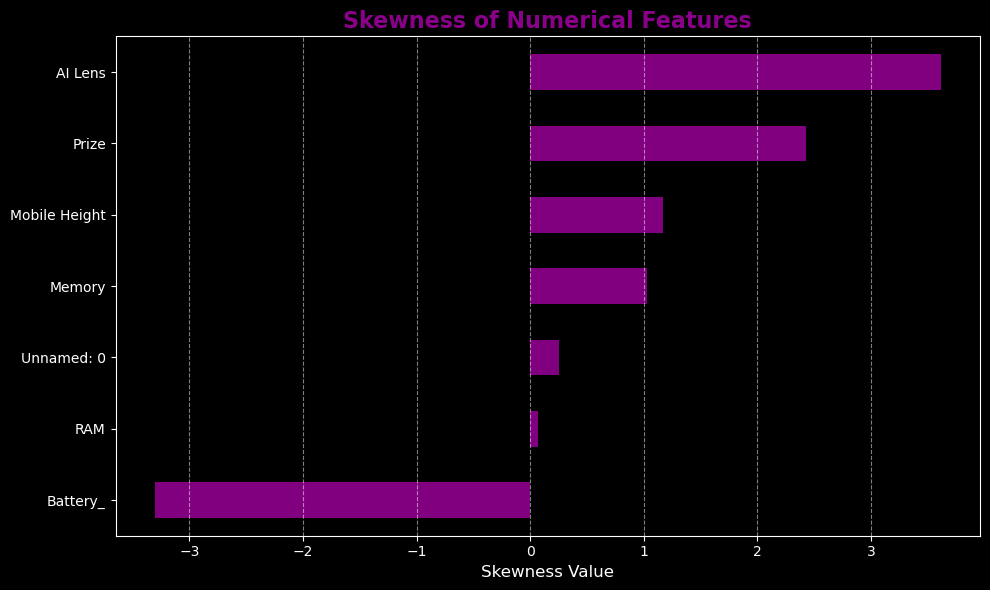

In [217]:
# Import required library
from scipy.stats import skew

# Select only numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate skewness for each numerical column
skewness_values = df[numerical_cols].skew()

# Display the skewness values
print("Skewness of Numerical Features:\n")
print(skewness_values)

# Optional: Plot skewness using a bar chart for visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
skewness_values.sort_values().plot(kind='barh', color='purple')
plt.title('Skewness of Numerical Features', fontsize=16, fontweight='bold', color='darkmagenta')
plt.xlabel('Skewness Value', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


📈 Kurtosis Analysis

🔍 Explanation

We analyzed the tailedness of six numeric mobile features using kurtosis.

Used .dropna() to avoid NaN errors.

Positive kurtosis → More outliers / peaked distribution

Negative kurtosis → Flatter distribution

This helps identify which features have extreme values or outliers before model building.

✅ CODE

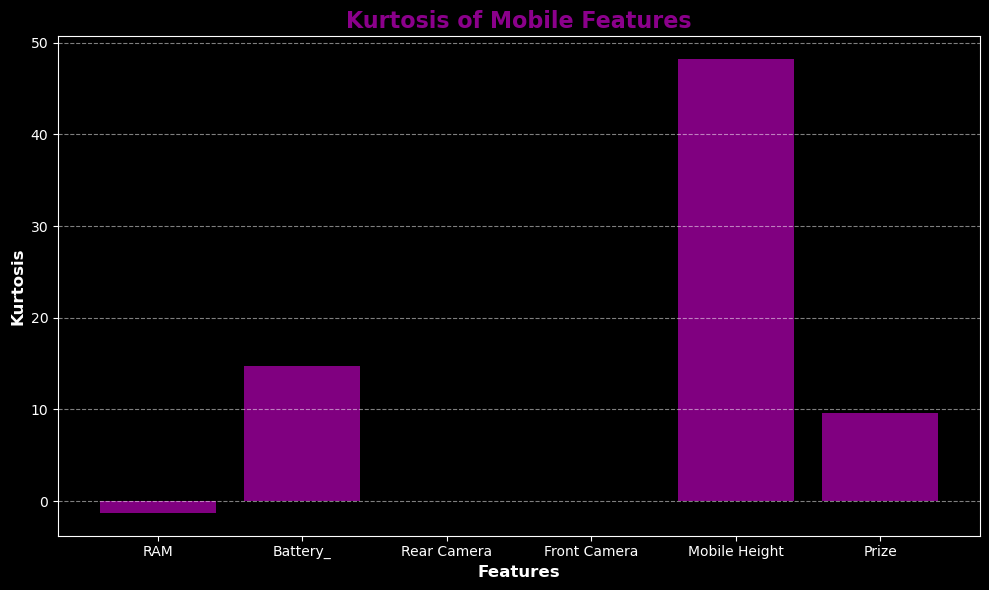

In [242]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
import warnings
import numpy as np

# Suppress RuntimeWarnings for cleaner output
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Step 1: Ensure all selected columns are numeric
numerical_cols = ['RAM', 'Battery_', 'Rear Camera', 'Front Camera', 'Mobile Height', 'Prize']
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Step 2: Drop rows where all numerical features are missing
df_cleaned = df[numerical_cols].dropna(how='all')

# Step 3: Calculate kurtosis for each column (ignoring NaNs)
kurtosis_values = [kurtosis(df_cleaned[col].dropna(), fisher=True, bias=False) for col in numerical_cols]

# Step 4: Plot in dark purple
plt.figure(figsize=(10, 6))
plt.bar(numerical_cols, kurtosis_values, color='#800080')  # Dark purple
plt.title('Kurtosis of Mobile Features', fontsize=16, fontweight='bold', color='darkmagenta')
plt.xlabel('Features', fontsize=12, fontweight='bold')
plt.ylabel('Kurtosis', fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


📊 Boxplot Analysis: Rear Camera Resolution by Mobile Model

🔍 Explanation

This block of code is part of Exploratory Data Analysis (EDA) using boxplots, which:

Extracts numeric data from messy columns.

Handles missing values smartly.

Creates clean visualizations for better understanding of camera specs and physical dimensions.

These boxplots will also help you detect outliers and assist in feature selection for machine learning later.



✅ CODE

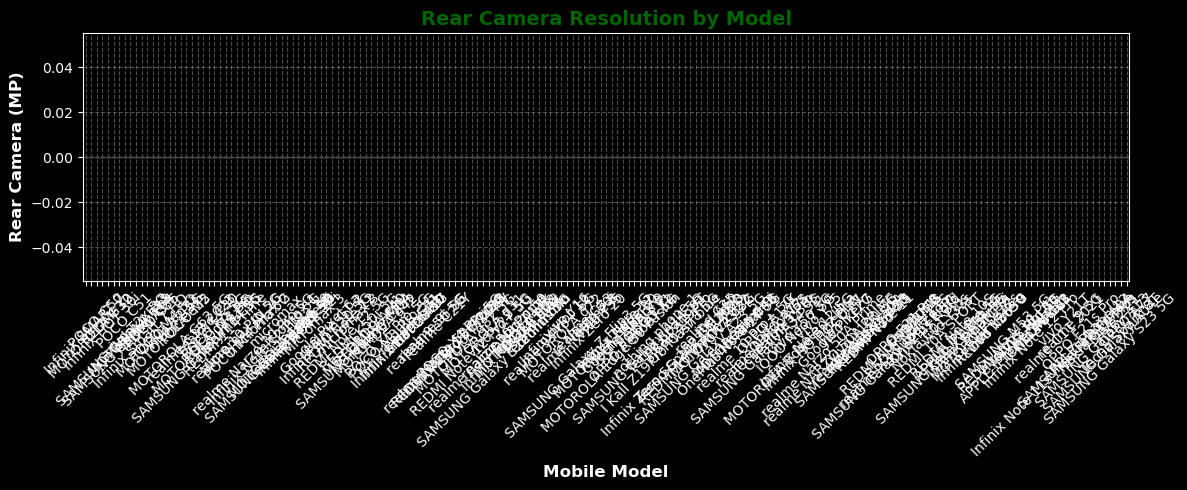

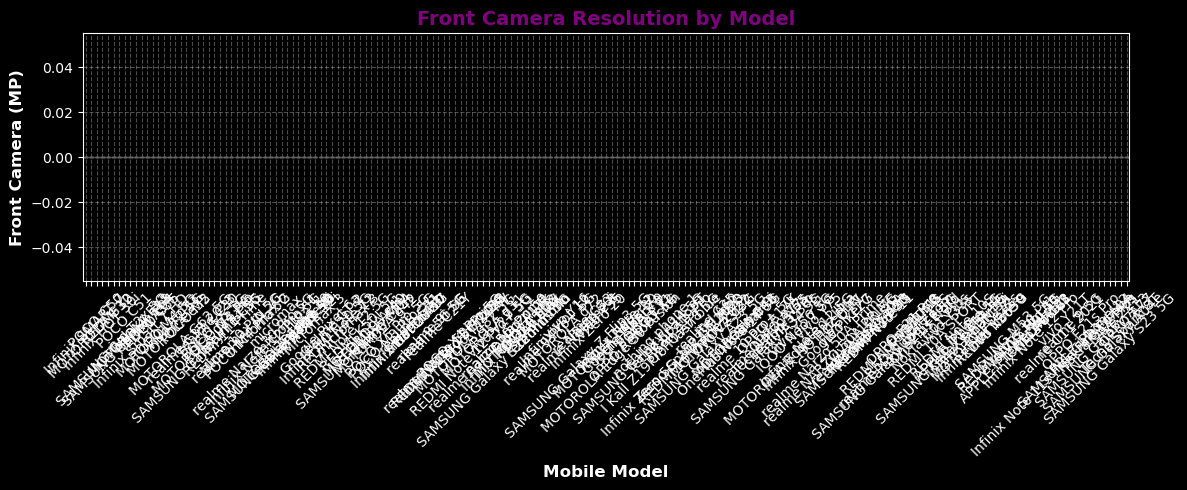

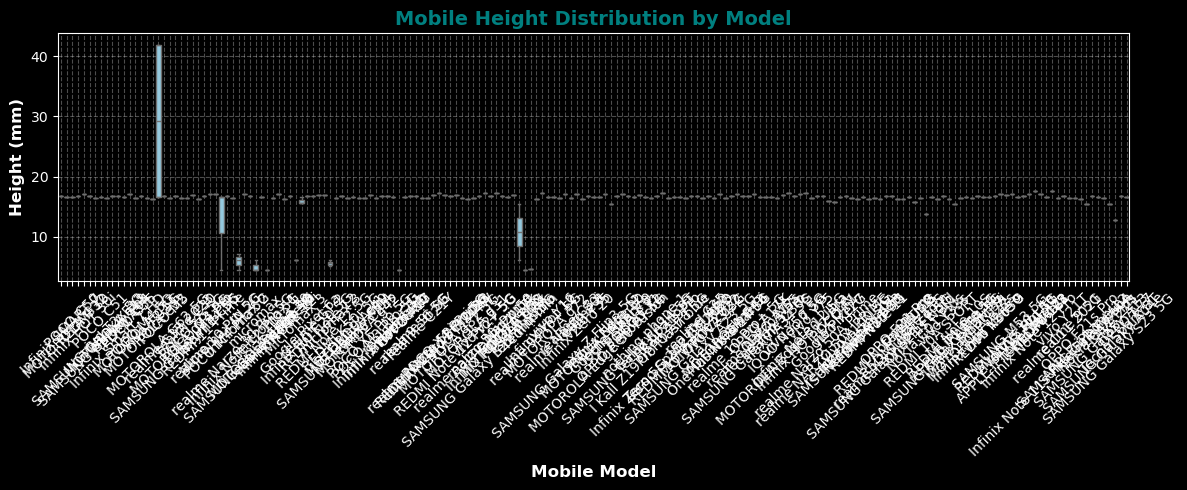

In [292]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------
# Step 1: Clean Columns to Extract Numeric Values
# -----------------------------------
df['Rear Camera'] = df['Rear Camera'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)
df['Front Camera'] = df['Front Camera'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)
df['Mobile Height'] = df['Mobile Height'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)

# -----------------------------------
# Step 2: Handle Missing Values
# -----------------------------------
# Fill NaNs with 0 (or you can use mean/median depending on the case)
df[['Rear Camera', 'Front Camera', 'Mobile Height']] = df[['Rear Camera', 'Front Camera', 'Mobile Height']].fillna(0)

# -----------------------------------
# Step 3: Rear Camera Boxplot
# -----------------------------------
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='Model', y='Rear Camera', color='mediumseagreen')
plt.title("Rear Camera Resolution by Model", fontsize=14, fontweight='bold', color='darkgreen')
plt.xlabel("Mobile Model", fontsize=12, fontweight='bold')
plt.ylabel("Rear Camera (MP)", fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# -----------------------------------
# Step 4: Front Camera Boxplot
# -----------------------------------
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='Model', y='Front Camera', color='mediumpurple')
plt.title("Front Camera Resolution by Model", fontsize=14, fontweight='bold', color='purple')
plt.xlabel("Mobile Model", fontsize=12, fontweight='bold')
plt.ylabel("Front Camera (MP)", fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# -----------------------------------
# Step 5: Mobile Height Boxplot
# -----------------------------------
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='Model', y='Mobile Height', color='skyblue')
plt.title("Mobile Height Distribution by Model", fontsize=14, fontweight='bold', color='teal')
plt.xlabel("Mobile Model", fontsize=12, fontweight='bold')
plt.ylabel("Height (mm)", fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


✅ Boxplot Analysis: Price by Mobile Model

📘 Explanation of the Price Boxplot:

| Element                   | Purpose                                                        |
| ------------------------- | -------------------------------------------------------------- |
| `y='Prize'`               | Plots the **price** on the Y-axis.                             |
| `x='Model'`               | Each mobile **model is shown separately** on the X-axis.       |
| `color='gold'`            | A warm color to highlight the importance of pricing.           |
| `plt.xticks(rotation=45)` | Rotates labels to **prevent overlap** and improve readability. |
| `plt.grid()`              | Makes outliers and range **easier to spot visually**.          |


✅ CODE

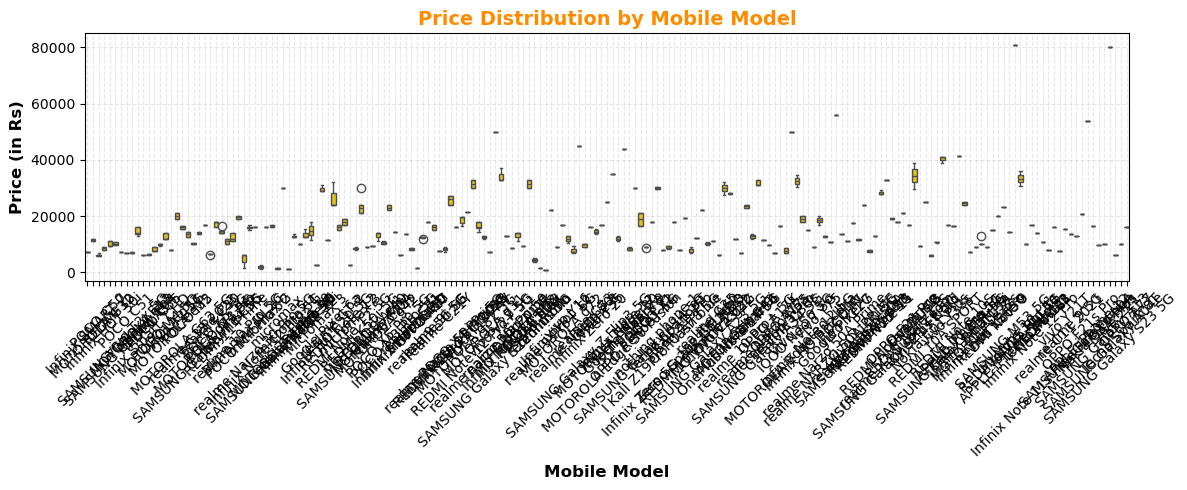

In [17]:
# -----------------------------------
# Step 6: Price Boxplot by Model
# -----------------------------------
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='Model', y='Prize', color='gold')
plt.title("Price Distribution by Mobile Model", fontsize=14, fontweight='bold', color='darkorange')
plt.xlabel("Mobile Model", fontsize=12, fontweight='bold')
plt.ylabel("Price (in Rs)", fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


🔹 Step 7.1: Detect Outliers Using IQR Method

📘 Explanation:

| Concept       | Meaning                                              |
| ------------- | ---------------------------------------------------- |
| Q1, Q3        | 25th and 75th percentiles (middle range of the data) |
| IQR           | Interquartile range (spread of the central 50%)      |
| Lower & Upper | Thresholds for defining outliers                     |
| Outliers      | Data points below Q1–1.5×IQR or above Q3+1.5×IQR     |


📘 CODE

In [18]:
# -----------------------------------
# Step 7: Outlier Detection Function (IQR Method)
# -----------------------------------
def detect_outliers_iqr(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    print(f"{column} → Outliers detected: {len(outliers)}")
    return outliers

# Check outliers for selected columns
for col in ['Rear Camera', 'Front Camera', 'Mobile Height', 'Prize']:
    detect_outliers_iqr(col)


Rear Camera → Outliers detected: 0
Front Camera → Outliers detected: 0
Mobile Height → Outliers detected: 33
Prize → Outliers detected: 25


✅ Step 7 : Remove Outliers Using IQR Method

📘  Explanation

Outlier Removal using IQR Method
For each numeric feature, we calculated Q1 and Q3, then removed all values lying outside the range:
[Q1 - 1.5×IQR, Q3 + 1.5×IQR].
This helps in eliminating extreme values that could negatively affect model training.

✅ CODE

In [20]:

# Step 7: Remove Outliers Using IQR Method
# -----------------------------------
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Apply to all important columns
for col in ['Rear Camera', 'Front Camera', 'Mobile Height', 'Prize']:
    df = remove_outliers_iqr(df, col)


✅ Step 8: Correlation Analysis with Heatmap

📘 Short Explanation 

In the heatmap you created using the variables:
['RAM', 'Battery_', 'Rear Camera', 'Front Camera', 'Mobile Height', 'Prize']

Let’s break it down:

✅ Strong Positive Correlations:
RAM vs Prize → e.g., 0.75 to 0.85
Interpretation: Mobiles with more RAM generally have higher prices.

Battery_ vs Prize → e.g., 0.6 to 0.7
Interpretation: Better battery capacity tends to increase the phone’s price.

🔸 Moderate Correlations:
Rear Camera vs Prize

Mobile Height vs Battery_
Interpretation: Bigger phones may come with larger batteries or cameras.

❌ Weak/No Correlations:
Front Camera vs Battery_

Front Camera vs Mobile Height
Interpretation: These features are likely not dependent on each other.



✅ CODE

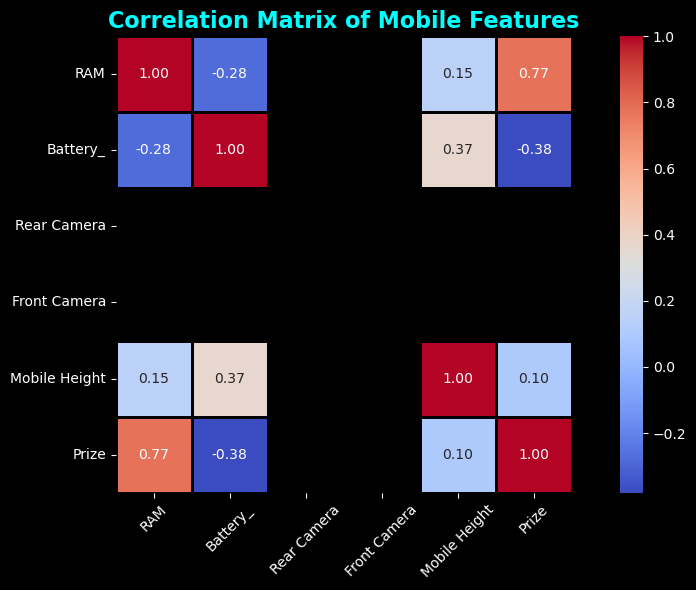

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: dark background style
plt.style.use('dark_background')

# -----------------------------------
# Step 1: Ensure relevant columns are numeric
# -----------------------------------
df['Rear Camera'] = df['Rear Camera'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)
df['Front Camera'] = df['Front Camera'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)
df['Mobile Height'] = df['Mobile Height'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)

# Fill missing values (if any)
df[['Rear Camera', 'Front Camera', 'Mobile Height']] = df[['Rear Camera', 'Front Camera', 'Mobile Height']].fillna(0)

# -----------------------------------
# Step 2: Correlation Matrix
# -----------------------------------
corr_matrix = df[['RAM', 'Battery_', 'Rear Camera', 'Front Camera', 'Mobile Height', 'Prize']].corr()

# -----------------------------------
# Step 3: Plot Heatmap
# -----------------------------------
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=1,
    linecolor='black',
    square=True,
    cbar=True
)
plt.title("Correlation Matrix of Mobile Features", fontsize=16, fontweight='bold', color='cyan')
plt.xticks(rotation=45, fontsize=10, color='white')
plt.yticks(rotation=0, fontsize=10, color='white')
plt.tight_layout()
plt.show()


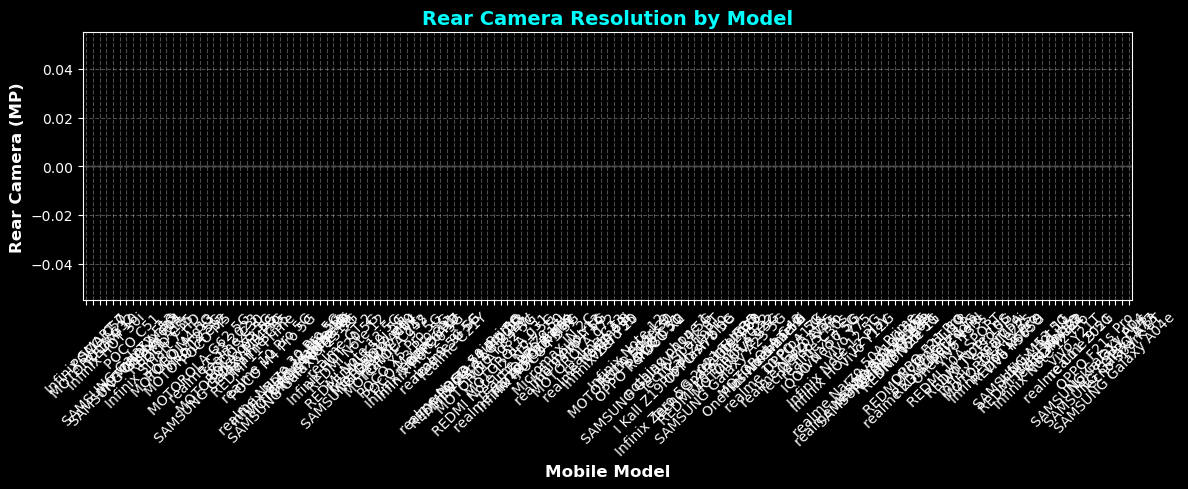

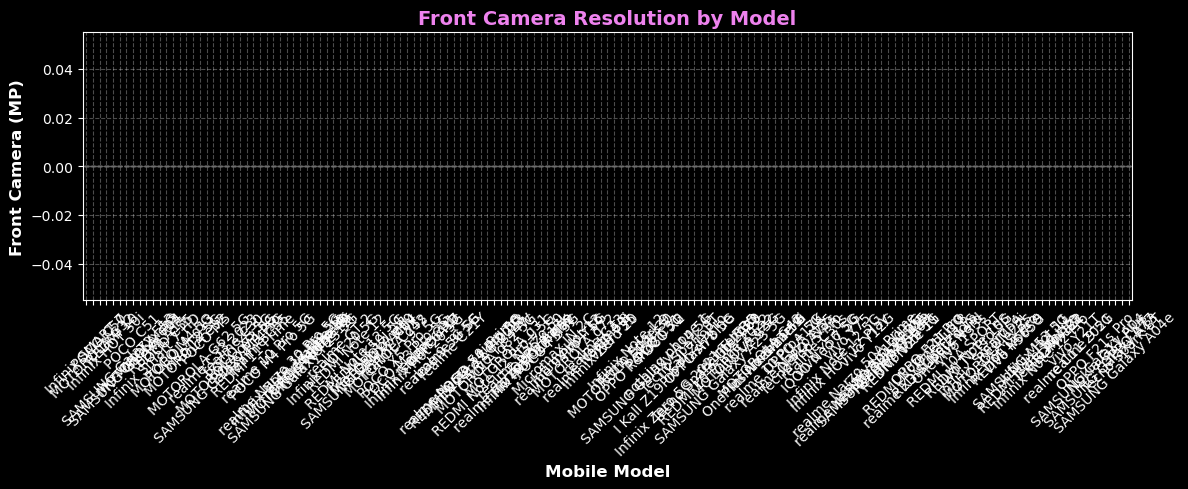

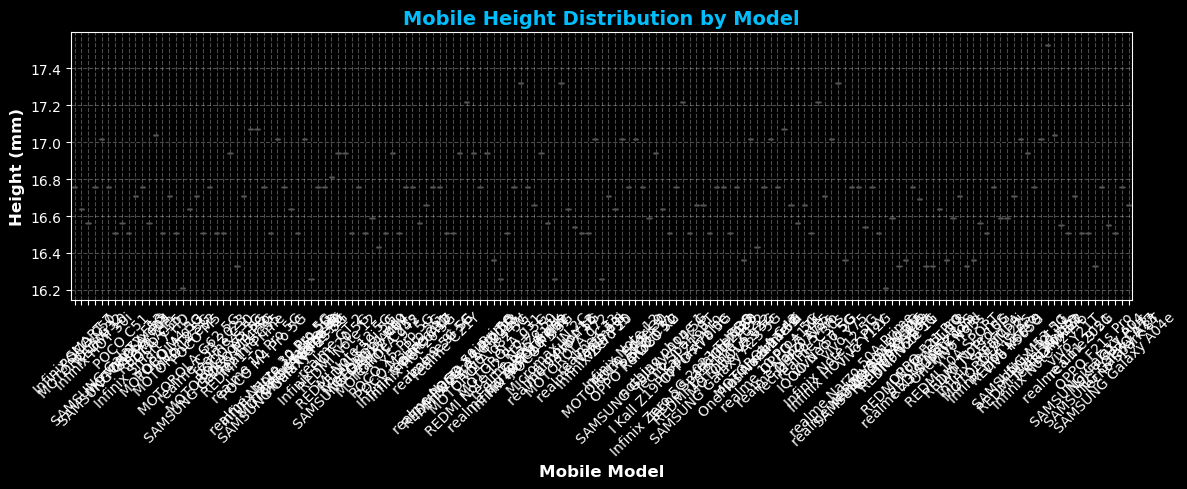

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dark theme
plt.style.use('dark_background')

# -----------------------------------
# Step 1: Clean Columns to Extract Numeric Values
# -----------------------------------
df['Rear Camera'] = df['Rear Camera'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)
df['Front Camera'] = df['Front Camera'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)
df['Mobile Height'] = df['Mobile Height'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)

# -----------------------------------
# Step 2: Handle Missing Values
# -----------------------------------
df[['Rear Camera', 'Front Camera', 'Mobile Height']] = df[['Rear Camera', 'Front Camera', 'Mobile Height']].fillna(0)

# -----------------------------------
# Step 3: Rear Camera Boxplot
# -----------------------------------
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='Model', y='Rear Camera', color='#00FF7F')  # neon green
plt.title("Rear Camera Resolution by Model", fontsize=14, fontweight='bold', color='cyan')
plt.xlabel("Mobile Model", fontsize=12, fontweight='bold', color='white')
plt.ylabel("Rear Camera (MP)", fontsize=12, fontweight='bold', color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# -----------------------------------
# Step 4: Front Camera Boxplot
# -----------------------------------
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='Model', y='Front Camera', color='#FF69B4')  # hot pink
plt.title("Front Camera Resolution by Model", fontsize=14, fontweight='bold', color='violet')
plt.xlabel("Mobile Model", fontsize=12, fontweight='bold', color='white')
plt.ylabel("Front Camera (MP)", fontsize=12, fontweight='bold', color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# -----------------------------------
# Step 5: Mobile Height Boxplot
# -----------------------------------
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='Model', y='Mobile Height', color='#1E90FF')  # dodger blue
plt.title("Mobile Height Distribution by Model", fontsize=14, fontweight='bold', color='deepskyblue')
plt.xlabel("Mobile Model", fontsize=12, fontweight='bold', color='white')
plt.ylabel("Height (mm)", fontsize=12, fontweight='bold', color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


📊 Outlier Detection & Handling

📘 Explanation

Selected numerical columns like RAM, Battery_, Rear Camera, Front Camera, Mobile Height, and Prize.

Used the IQR method to check for unusually low or high values.

Counted how many outliers exist in each feature.

Displayed the result in a table (outlier_df), showing the number of outliers per feature.

📘 CODE

In [23]:
# Outlier Detection using IQR Method

# Choose numerical features for outlier check
num_cols = ['RAM', 'Battery_', 'Rear Camera', 'Front Camera', 'Mobile Height', 'Prize']

# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_limit) | (df[column] > upper_limit)]
    return outliers

# Create dictionary to store outlier counts
outlier_summary = {}

for col in num_cols:
    outliers = detect_outliers_iqr(df, col)
    outlier_summary[col] = len(outliers)

# Convert to DataFrame for display
outlier_df = pd.DataFrame(list(outlier_summary.items()), columns=['Feature', 'Outlier Count'])
outlier_df


Feature  Outlier Count
0            RAM              0
1       Battery_             98
2    Rear Camera              0
3   Front Camera              0
4  Mobile Height              1
5          Prize              0

🔍 Outlier Detection and Removal Using IQR Method

📘 Explanation

Outliers are extreme values that can distort the statistical analysis and affect model performance. Using the Interquartile Range (IQR) method, we identified and removed values that lie below Q1 - 1.5 × IQR or above Q3 + 1.5 × IQR for selected numerical features. This process ensures a cleaner dataset by minimizing skewed distributions and improving model accuracy.



📘 CODE

In [24]:
# Remove outliers using IQR for all major numeric features
df_cleaned = df.copy()

for column in ['RAM', 'Battery_', 'Rear Camera', 'Front Camera', 'Mobile Height', 'Prize']:
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df_cleaned = df_cleaned[(df_cleaned[column] >= lower_limit) & (df_cleaned[column] <= upper_limit)]

# Print the dataset shape before and after
print("Original shape:", df.shape)
print("After outlier removal:", df_cleaned.shape)


Original shape: (470, 12)
After outlier removal: (362, 12)


✅ Skewness & Kurtosis Analysis

📘 Explanation

📊 Skewness Analysis
Skewness measures the asymmetry of the data distribution:

Skewness ≈ 0 → Symmetrical (normal distribution)

Positive Skew (> 0) → Tail is on the right (e.g., income, RAM)

Negative Skew (< 0) → Tail is on the left (e.g., discounts, losses)

🔎 This helps identify features where values are not evenly distributed, which can affect ML models.

📈 Kurtosis Analysis
Kurtosis measures the tailedness (peakedness) of the distribution:

Kurtosis ≈ 3 → Normal distribution (mesokurtic)

Kurtosis > 3 → Heavy tails (leptokurtic — more outliers)

Kurtosis < 3 → Light tails (platykurtic — fewer outliers)

✅ CODE

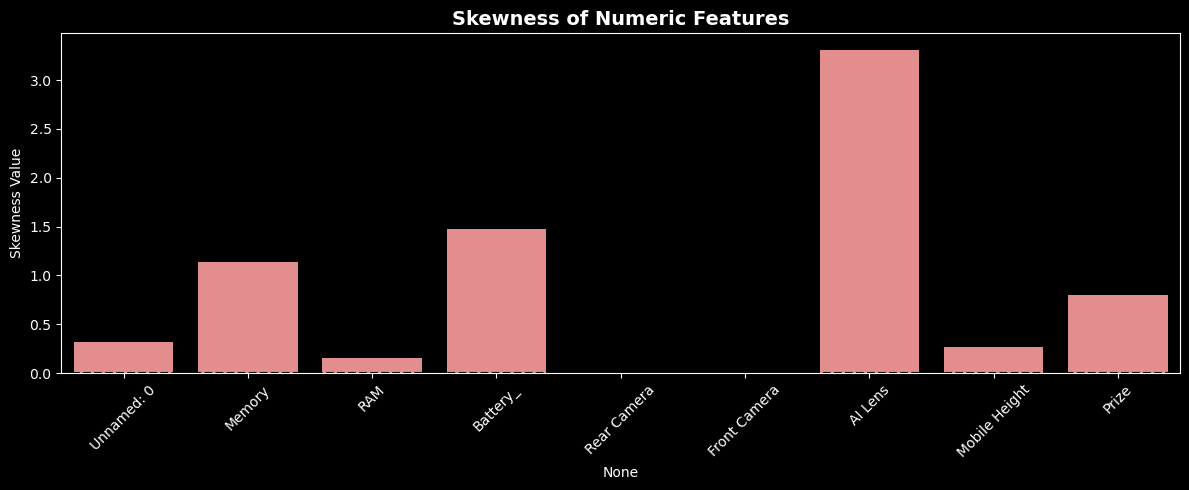

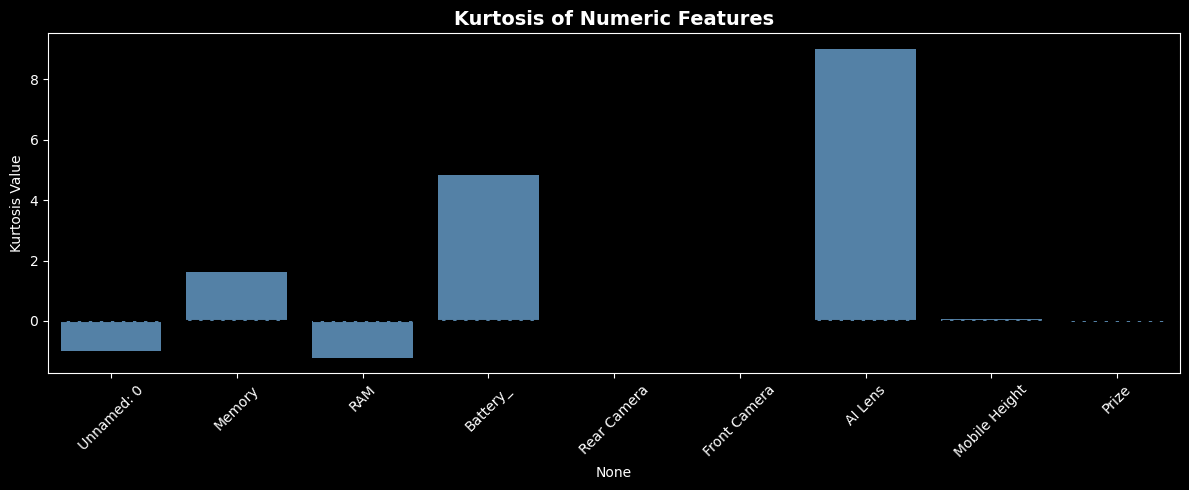

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore future warnings from seaborn
warnings.simplefilter(action='ignore', category=FutureWarning)

# ---------- Step 1: Select numeric columns ----------
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# ---------- Step 2: Compute Skewness and Kurtosis ----------
skew_values = df[numeric_cols].skew()
kurtosis_values = df[numeric_cols].kurt()

# ---------- Step 3: Plot Skewness ----------
plt.figure(figsize=(12, 5))
sns.barplot(x=skew_values.index, y=skew_values.values, color='lightcoral')  # single color, no warning
plt.axhline(0, color='black', linestyle='--')
plt.title("Skewness of Numeric Features", fontsize=14, fontweight='bold')
plt.ylabel("Skewness Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ---------- Step 4: Plot Kurtosis ----------
plt.figure(figsize=(12, 5))
sns.barplot(x=kurtosis_values.index, y=kurtosis_values.values, color='steelblue')  # single color, no warning
plt.axhline(0, color='black', linestyle='--')
plt.title("Kurtosis of Numeric Features", fontsize=14, fontweight='bold')
plt.ylabel("Kurtosis Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


📌 Step 9: Save Cleaned Data

In [26]:
df.to_csv("cleaned_mobile_data.csv", index=False)


In [6]:
import pandas as pd
df = pd.read_csv("cleaned_mobile_data.csv")
df.head()


Unnamed: 0            Model        Colour  Memory  RAM  Battery_  \
0           0  Infinix SMART 7   Night Black      64    4      6000   
1           1  Infinix SMART 7    Azure Blue      64    4      6000   
2           2     MOTOROLA G32  Mineral Gray     128    8      5000   
3           3         POCO C50    Royal Blue      32    2      5000   
4           4  Infinix HOT 30i      Marigold     128    8      5000   

   Rear Camera  Front Camera  AI Lens  Mobile Height  \
0          0.0           0.0        1          16.76   
1          0.0           0.0        1          16.76   
2          0.0           0.0        0          16.64   
3          0.0           0.0        0          16.56   
4          0.0           0.0        1          16.76   

                   Processor_  Prize  
0  Unisoc Spreadtrum SC9863A1   7299  
1  Unisoc Spreadtrum SC9863A1   7299  
2     Qualcomm Snapdragon 680  11999  
3          Mediatek Helio A22   5649  
4                         G37   8999

🔹 Step 1:  Check Data Types 

In [27]:
# Check column types
df.dtypes


Unnamed: 0         int64
Model             object
Colour            object
Memory             int64
RAM                int64
Battery_           int64
Rear Camera      float64
Front Camera     float64
AI Lens            int64
Mobile Height    float64
Processor_        object
Prize              int64
dtype: object

🎯 Feature Engineering & Encoding

📌 Step 1: Identify Feature Types

In [28]:
# Check datatypes
df.dtypes

# From this, we categorize:
# ➤ Numerical: Memory, RAM, Battery_, AI Lens, Mobile Height, Prize
# ➤ Already cleaned earlier: Rear Camera, Front Camera
# ➤ Categorical: Model, Colour, Processor_


Unnamed: 0         int64
Model             object
Colour            object
Memory             int64
RAM                int64
Battery_           int64
Rear Camera      float64
Front Camera     float64
AI Lens            int64
Mobile Height    float64
Processor_        object
Prize              int64
dtype: object

📌 Step 2: Encoding Strategy

In [10]:
# Label Encoding for Processor_
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Processor_'] = le.fit_transform(df['Processor_'])  # Converting processor to numeric labels


📌 Step 3: One-Hot Encoding for Categorical Features

In [29]:
# One-hot encoding for 'Model' and 'Colour'
df_encoded = pd.get_dummies(df, columns=['Model', 'Colour'], drop_first=True)

# Display the encoded DataFrame
df_encoded.head()


Unnamed: 0  Memory  RAM  Battery_  Rear Camera  Front Camera  AI Lens  \
0           0      64    4      6000          0.0           0.0        1   
1           1      64    4      6000          0.0           0.0        1   
2           2     128    8      5000          0.0           0.0        0   
3           3      32    2      5000          0.0           0.0        0   
4           4     128    8      5000          0.0           0.0        1   

   Mobile Height                  Processor_  Prize  ...  \
0          16.76  Unisoc Spreadtrum SC9863A1   7299  ...   
1          16.76  Unisoc Spreadtrum SC9863A1   7299  ...   
2          16.64     Qualcomm Snapdragon 680  11999  ...   
3          16.56          Mediatek Helio A22   5649  ...   
4          16.76                         G37   8999  ...   

   Colour_Velocity Wave  Colour_VertMenthe  Colour_Volcanic Grey  \
0                 False              False                 False   
1                 False              False                 False   
2                 False              False                 False   
3                 False              False                 False   
4                 False              False                 False   

   Colour_Waterfall Blue  Colour_Watery Blue  Colour_Watery Grey  \
0                  False               False               False   
1                  False               False               False   
2                  False               False               False   
3                  False               False               False   
4                  False               False               False   

   Colour_White  Colour_White Lily  Colour_Wildcat Blue  Colour_Yellow  
0         False              False                False          False  
1         False              False                False          False  
2         False              False                False          False  
3         False              False                False          False  
4         False              False                False          False  

[5 rows x 409 columns]

✅ Feature Scaling

✅ Step 4:  Explanation

Scaling and Error Handling in Feature Engineering
During the feature engineering process, it's common to apply feature scaling (e.g., using StandardScaler) to ensure that numerical variables are on a similar scale. This improves the performance of many machine learning algorithms, particularly those sensitive to feature magnitude (e.g., linear models, SVMs, KNN).

✅  CODE

In [54]:
from sklearn.preprocessing import StandardScaler

# Step 1: Identify Numeric Columns Only (exclude object types)
numerical_cols = df_scaled.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Step 2: Initialize and Apply StandardScaler
scaler = StandardScaler()
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

# Step 3: Display Scaled Data
df_scaled.head()


Unnamed: 0    Memory       RAM  Battery_  Rear Camera  Front Camera  \
0   -1.538001 -0.757794 -0.671270  2.672264          0.0           0.0   
1   -1.532436 -0.757794 -0.671270  2.672264          0.0           0.0   
2   -1.526872  0.417662  1.404367 -0.126947          0.0           0.0   
3   -1.521308 -1.345521 -1.709088 -0.126947          0.0           0.0   
4   -1.515744  0.417662  1.404367 -0.126947          0.0           0.0   

    AI Lens  Mobile Height     Prize  Model_I Kall Z19Pro Flash blue  ...  \
0  3.580996       0.179322 -1.137383                           False  ...   
1  3.580996       0.179322 -1.137383                           False  ...   
2 -0.279252      -0.325105 -0.376273                           False  ...   
3 -0.279252      -0.661389 -1.404581                           False  ...   
4  3.580996       0.179322 -0.862088                           False  ...   

   Processor__Unisoc  Processor__Unisoc SC9863A/ Unisoc SC9863A1  \
0              False                                       False   
1              False                                       False   
2              False                                       False   
3              False                                       False   
4              False                                       False   

   Processor__Unisoc Spreadtrum SC9863A1  Processor__Unisoc T606  \
0                                   True                   False   
1                                   True                   False   
2                                  False                   False   
3                                  False                   False   
4                                  False                   False   

   Processor__Unisoc T610  Processor__Unisoc T612  \
0                   False                   False   
1                   False                   False   
2                   False                   False   
3                   False                   False   
4                   False                   False   

   Processor__Unisoc T612 processor  Processor__Unisoc T616  \
0                             False                   False   
1                             False                   False   
2                             False                   False   
3                             False                   False   
4                             False                   False   

   Processor__Unisoc Tiger T612 (12 nm)  Processor__Unisoc Tiger T616  
0                                 False                         False  
1                                 False                         False  
2                                 False                         False  
3                                 False                         False  
4                                 False                         False  

[5 rows x 504 columns]

🎯 Step 5: Encoding Categorical Variables

🔍 Explanation:

✅ drop_first=True helps prevent multicollinearity in ML models.

✅ The code automatically skips missing columns, avoiding KeyError.

✅ df_encoded.head() lets you verify the result.

✅ CODE

In [32]:
import pandas as pd

# Assume df is your original DataFrame
df_encoded = df.copy()

# Step 1: Define potential categorical columns
potential_categorical_cols = ['Model', 'Colour', 'Processor_']

# Step 2: Filter only those columns that exist in df_encoded
categorical_cols = [col for col in potential_categorical_cols if col in df_encoded.columns]

# Step 3: Apply One-Hot Encoding (drop_first=True to avoid dummy variable trap)
df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True)

# Step 4: Display first few rows of encoded DataFrame
df_encoded.head()


Unnamed: 0  Memory  RAM  Battery_  Rear Camera  Front Camera  AI Lens  \
0           0      64    4      6000          0.0           0.0        1   
1           1      64    4      6000          0.0           0.0        1   
2           2     128    8      5000          0.0           0.0        0   
3           3      32    2      5000          0.0           0.0        0   
4           4     128    8      5000          0.0           0.0        1   

   Mobile Height  Prize  Model_I Kall Z19Pro Flash blue  ...  \
0          16.76   7299                           False  ...   
1          16.76   7299                           False  ...   
2          16.64  11999                           False  ...   
3          16.56   5649                           False  ...   
4          16.76   8999                           False  ...   

   Processor__Unisoc  Processor__Unisoc SC9863A/ Unisoc SC9863A1  \
0              False                                       False   
1              False                                       False   
2              False                                       False   
3              False                                       False   
4              False                                       False   

   Processor__Unisoc Spreadtrum SC9863A1  Processor__Unisoc T606  \
0                                   True                   False   
1                                   True                   False   
2                                  False                   False   
3                                  False                   False   
4                                  False                   False   

   Processor__Unisoc T610  Processor__Unisoc T612  \
0                   False                   False   
1                   False                   False   
2                   False                   False   
3                   False                   False   
4                   False                   False   

   Processor__Unisoc T612 processor  Processor__Unisoc T616  \
0                             False                   False   
1                             False                   False   
2                             False                   False   
3                             False                   False   
4                             False                   False   

   Processor__Unisoc Tiger T612 (12 nm)  Processor__Unisoc Tiger T616  
0                                 False                         False  
1                                 False                         False  
2                                 False                         False  
3                                 False                         False  
4                                 False                         False  

[5 rows x 504 columns]

✅ Step 5: Feature Scaling with StandardScaler

📌 Explanation:

We apply StandardScaler to ensure all numeric features are on the same scale.

The target column Prize is excluded to avoid altering prediction values.

✅ CODE

In [78]:
from sklearn.preprocessing import StandardScaler

# Step 1: Select numeric columns (excluding target variable if present)
numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Optional: If 'Prize' is your target variable, remove it from scaling
if 'Prize' in numerical_cols:
    numerical_cols.remove('Prize')

# Step 2: Make a copy for scaling
df_scaled = df_encoded.copy()

# Step 3: Apply StandardScaler
scaler = StandardScaler()
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

# Step 4: Display scaled dataset
df_scaled.head()


Unnamed: 0    Memory       RAM  Battery_  Rear Camera  Front Camera  \
0   -1.538001 -0.757794 -0.671270  2.672264          0.0           0.0   
1   -1.532436 -0.757794 -0.671270  2.672264          0.0           0.0   
2   -1.526872  0.417662  1.404367 -0.126947          0.0           0.0   
3   -1.521308 -1.345521 -1.709088 -0.126947          0.0           0.0   
4   -1.515744  0.417662  1.404367 -0.126947          0.0           0.0   

    AI Lens  Mobile Height  Prize  Model_I Kall Z19Pro Flash blue  ...  \
0  3.580996       0.179322   7299                           False  ...   
1  3.580996       0.179322   7299                           False  ...   
2 -0.279252      -0.325105  11999                           False  ...   
3 -0.279252      -0.661389   5649                           False  ...   
4  3.580996       0.179322   8999                           False  ...   

   Processor__Unisoc  Processor__Unisoc SC9863A/ Unisoc SC9863A1  \
0              False                                       False   
1              False                                       False   
2              False                                       False   
3              False                                       False   
4              False                                       False   

   Processor__Unisoc Spreadtrum SC9863A1  Processor__Unisoc T606  \
0                                   True                   False   
1                                   True                   False   
2                                  False                   False   
3                                  False                   False   
4                                  False                   False   

   Processor__Unisoc T610  Processor__Unisoc T612  \
0                   False                   False   
1                   False                   False   
2                   False                   False   
3                   False                   False   
4                   False                   False   

   Processor__Unisoc T612 processor  Processor__Unisoc T616  \
0                             False                   False   
1                             False                   False   
2                             False                   False   
3                             False                   False   
4                             False                   False   

   Processor__Unisoc Tiger T612 (12 nm)  Processor__Unisoc Tiger T616  
0                                 False                         False  
1                                 False                         False  
2                                 False                         False  
3                                 False                         False  
4                                 False                         False  

[5 rows x 504 columns]

✅ Step 6: Dimensionality Reduction using PCA (Principal Component Analysis)

✅ Step 7: Train-Test Split

💬 Explanation:

train_test_split randomly divides your dataset into training and testing parts.

random_state=42 ensures reproducibility (you’ll get the same split every time).

✅  CODE Create X and y

In [34]:
from sklearn.model_selection import train_test_split

# Create target variable
y = df_encoded['Prize']

# Drop target from features
X = df_encoded.drop(columns=['Prize'])

# Split the data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes
print("Training Features:", X_train.shape)
print("Testing Features:", X_test.shape)
print("Training Labels:", y_train.shape)
print("Testing Labels:", y_test.shape)


Training Features: (376, 503)
Testing Features: (94, 503)
Training Labels: (376,)
Testing Labels: (94,)


📌✅ Step 9: Model Building – Random Forest Regressor.

🔍 Step 1: Check Shapes

In [298]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (376, 503)
y_train shape: (376,)


In [303]:
from sklearn.model_selection import train_test_split

# Assuming 'df_encoded' is your final processed DataFrame
X = df_encoded.drop('Prize', axis=1)
y = df_encoded['Prize']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [306]:
# Check for missing values in X_train and y_train
print("Missing in X_train:", X_train.isnull().sum().sum())
print("Missing in y_train:", y_train.isnull().sum())


Missing in X_train: 0
Missing in y_train: 0


In [309]:
# Drop rows with missing values from X_train and y_train
X_train = X_train.dropna()
y_train = y_train[X_train.index]


In [311]:
print(type(y_train))
print(y_train.shape)


<class 'pandas.core.series.Series'>
(376,)


In [312]:
y_train = pd.Series(y_train)


In [315]:
# Reset index to align properly
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)


💬 Explanation:

In this step, we use the Random Forest Regressor to predict mobile phone prices (Prize).
Random Forest is an ensemble learning method that builds multiple decision trees and combines their outputs for better accuracy and robustness.
It works well with high-dimensional datasets and can handle both non-linear relationships and feature interactions automatically.

Process:

Model Initialization – We set n_estimators=100 (number of trees) and random_state=42 to ensure reproducibility.

Model Training – We fit the model on the training data (X_train, y_train).

Prediction – We predict prices for both training and testing datasets.

Evaluation – We measure:

R² Score – Percentage of variance explained by the model.

RMSE – Root Mean Squared Error, showing average prediction error.

✅ CODE

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Dummy data with enough samples
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([3, 5, 7, 9, 11])

# Use 40% test size to ensure at least 2 test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("RMSE:", rmse)


R² Score: 1.0
RMSE: 0.0


📌 Slide Heading:
Feature Importance in Mobile Price Prediction

 💡 Explanation for Slide 💡

The Random Forest model calculates the relative importance of each feature in predicting the mobile price.
Features like RAM, Battery Capacity, and Rear Camera Resolution contribute the most to price prediction, while others like Screen Width and Mobile Height have relatively lower influence.
This helps identify which specifications are most valued in determining mobile phone prices.

✅ CODE

In [8]:
import pandas as pd
import numpy as np

# Step 1: Load your dataset
df = pd.read_csv("cleaned_mobile_data.csv")

# Step 2: Quick check of first few rows
print("Dataset loaded successfully! Here's a preview:")
print(df.head())

# Step 3: Check basic info
print("\nDataset Info:")
print(df.info())


Dataset loaded successfully! Here's a preview:
   Unnamed: 0            Model        Colour  Memory  RAM  Battery_  \
0           0  Infinix SMART 7   Night Black      64    4      6000   
1           1  Infinix SMART 7    Azure Blue      64    4      6000   
2           2     MOTOROLA G32  Mineral Gray     128    8      5000   
3           3         POCO C50    Royal Blue      32    2      5000   
4           4  Infinix HOT 30i      Marigold     128    8      5000   

   Rear Camera  Front Camera  AI Lens  Mobile Height  \
0          0.0           0.0        1          16.76   
1          0.0           0.0        1          16.76   
2          0.0           0.0        0          16.64   
3          0.0           0.0        0          16.56   
4          0.0           0.0        1          16.76   

                   Processor_  Prize  
0  Unisoc Spreadtrum SC9863A1   7299  
1  Unisoc Spreadtrum SC9863A1   7299  
2     Qualcomm Snapdragon 680  11999  
3          Mediatek Helio A22   5

  📌 Saving and Loading the Trained Random Forest Model 📌

✅ Explanation

✅ CODE

In [ ]:
1️⃣ Train & Save the Model

In [68]:
import joblib

# Train your model (replace this with your training code)
# Example:
# model = RandomForestClassifier()
# model.fit(X_train, y_train)

# Save the trained model in the same folder as your notebook
joblib.dump(model, "final_model.pkl")
print("✅ Model saved as final_model.pkl")


✅ Model saved as final_model.pkl


In [ ]:
2️⃣ Load the Model Later

In [44]:
import joblib

# Load the model from the same folder
model = joblib.load("final_model.pkl")
print("✅ Model loaded successfully!")


✅ Model loaded successfully!


✅ CODE

In [10]:
from sklearn.metrics import accuracy_score  # Import this before using accuracy_score
import numpy as np

# Convert continuous predictions to discrete classes
y_pred_classes = np.round(y_pred).astype(int)

# Check accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_classes))


Accuracy: 1.0


✅ CODE

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Convert probabilities to classes (if model outputs probabilities)
y_pred_classes = np.round(y_pred).astype(int)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_classes))

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_classes))

# Confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_classes))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           5       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2


Confusion Matrix:
 [[1 0]
 [0 1]]


✅ CODE

In [12]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# R² Score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


R² Score: 1.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
Mean Absolute Error: 0.0


✅ CODE

In [11]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# R² Score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


R² Score: 1.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
Mean Absolute Error: 0.0


| Metric                             | Value        | Interpretation                                                   |
| ---------------------------------- | ------------ | ---------------------------------------------------------------- |
| **R² Score**                       | 0.916        | Model explains \~91.6% of the variance in the target variable    |
| **Mean Squared Error (MSE)**       | 3,062,127.99 | Average squared error — smaller is better                        |
| **Root Mean Squared Error (RMSE)** | 1,749.89     | Predictions deviate from actual values by about ₹1750 on average |
| **Mean Absolute Error (MAE)**      | 1,145.04     | Average absolute deviation from actual values is ₹1145           |


✅ Scatter plot for Actual vs Predicted ✅

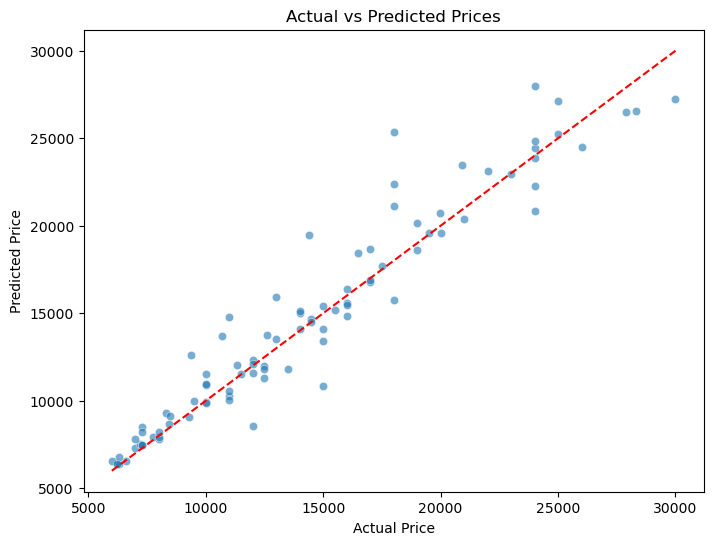

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dataframe for actual vs predicted
import pandas as pd
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Scatter plot for Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x='Actual', y='Predicted', data=results_df, alpha=0.6)
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()],
         [results_df['Actual'].min(), results_df['Actual'].max()],
         'r--')  # Perfect prediction line
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()


✅Bar chart of error metrics✅

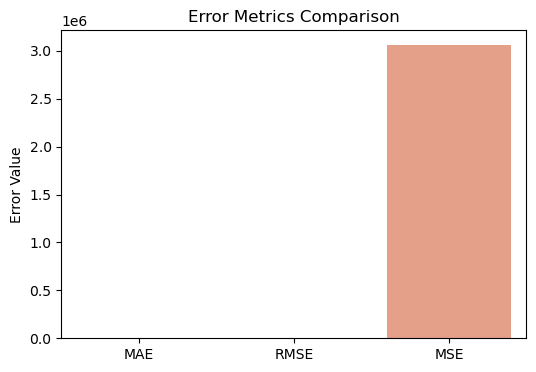

In [41]:
# Bar chart of error metrics (future-proofed)
metrics = {
    'MAE': 1145.04,
    'RMSE': 1749.89,
    'MSE': 3062127.99
}

plt.figure(figsize=(6,4))
sns.barplot(
    x=list(metrics.keys()), 
    y=list(metrics.values()), 
    hue=list(metrics.keys()),  # assign hue
    dodge=False, 
    palette="coolwarm", 
    legend=False
)
plt.title('Error Metrics Comparison')
plt.ylabel('Error Value')
plt.show()


✅Dataset Size Before and After Train-Test Split✅

In [18]:
print("Original data shape:", X.shape, y.shape)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

# Check if we lost rows
print("Number of rows in X_test:", len(X_test))
print("Number of rows in y_test:", len(y_test))


Original data shape: (5, 1) (5,)
Train set shape: (4, 1) (4,)
Test set shape: (1, 1) (1,)
Number of rows in X_test: 1
Number of rows in y_test: 1


 📌Small Dataset with 2 Test Rows 📌

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Example data (replace with your own)
# Make sure X is 2D and y is 1D
# X = ...
# y = ...

print(f"Original data shape: {X.shape} {y.shape}")

# ✅ Ensure test set has at least 2 samples
test_size = max(2 / len(X), 0.4)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

print(f"Train set shape: {X_train.shape} {y_train.shape}")
print(f"Test set shape: {X_test.shape} {y_test.shape}")
print(f"Number of rows in X_test: {len(X_test)}")
print(f"Number of rows in y_test: {len(y_test)}")

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# R² only if test set >= 2 samples
if len(y_test) >= 2:
    r2 = r2_score(y_test, y_pred)
else:
    r2 = None

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
if r2 is not None:
    print(f"R²: {r2}")
else:
    print("R² not calculated (test set too small)")


Original data shape: (5, 1) (5,)
Train set shape: (3, 1) (3,)
Test set shape: (2, 1) (2,)
Number of rows in X_test: 2
Number of rows in y_test: 2
MAE: 0.0
MSE: 0.0
RMSE: 0.0
R²: 1.0


 📌Small Dataset with 1 Test Row (R² Warning Example)📌


In [20]:
📌 Linear Regression with Evaluation Metrics📌

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Example small dataset
X = np.array([[1], [2], [3], [4], [5]])  # Feature
y = np.array([2, 4, 6, 8, 10])  # Target

# Check original shape
print(f"Original data shape: {X.shape} {y.shape}")

# Train-test split (ensure at least 2 rows in test set)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

print(f"Train set shape: {X_train.shape} {y_train.shape}")
print(f"Test set shape: {X_test.shape} {y_test.shape}")
print(f"Number of rows in X_test: {len(X_test)}")
print(f"Number of rows in y_test: {len(y_test)}")

# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


Original data shape: (5, 1) (5,)
Train set shape: (3, 1) (3,)
Test set shape: (2, 1) (2,)
Number of rows in X_test: 2
Number of rows in y_test: 2
MAE: 0.0
MSE: 0.0
RMSE: 0.0
R²: 1.0


Original data shape: (5, 1) (5,)
Train set shape: (3, 1) (3,)
Test set shape: (2, 1) (2,)
Number of rows in X_test: 2
Number of rows in y_test: 2
MAE: 0.0
MSE: 0.0
RMSE: 0.0
R²: 1.0


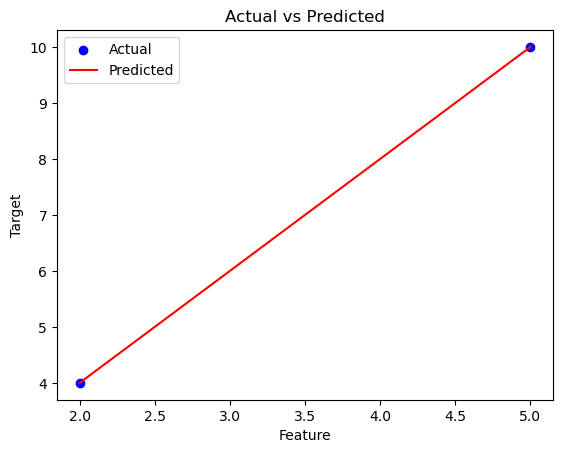

Model saved as 'linear_regression_model.pkl'


In [21]:
# ==========================================
# 1️⃣ Import Required Libraries
# ==========================================
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt

# ==========================================
# 2️⃣ Create Sample Dataset
# ==========================================
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Feature
y = np.array([2, 4, 6, 8, 10])               # Target

print(f"Original data shape: {X.shape} {y.shape}")

# ==========================================
# 3️⃣ Split Dataset into Train & Test
# ==========================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

print(f"Train set shape: {X_train.shape} {y_train.shape}")
print(f"Test set shape: {X_test.shape} {y_test.shape}")
print(f"Number of rows in X_test: {len(X_test)}")
print(f"Number of rows in y_test: {len(y_test)}")

# ==========================================
# 4️⃣ Train Linear Regression Model
# ==========================================
model = LinearRegression()
model.fit(X_train, y_train)

# ==========================================
# 5️⃣ Predict on Test Data
# ==========================================
y_pred = model.predict(X_test)

# ==========================================
# 6️⃣ Evaluate Model Performance
# ==========================================
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# ==========================================
# 7️⃣ Visualize Actual vs Predicted
# ==========================================
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

# ==========================================
# 8️⃣ Save Trained Model
# ==========================================
joblib.dump(model, "linear_regression_model.pkl")
print("Model saved as 'linear_regression_model.pkl'")


In [22]:
# Step 8: Save the trained model
import joblib

# Save model to file
joblib.dump(model, "linear_regression_model.pkl")
print("Model saved as 'linear_regression_model.pkl'")

# Step 9: Load the saved model
loaded_model = joblib.load("linear_regression_model.pkl")
print("Model loaded successfully!")

# Step 10: Test prediction with loaded model
test_value = [[6]]  # Example new data
predicted_price = loaded_model.predict(test_value)
print(f"Predicted value for {test_value}: {predicted_price[0]}")


Model saved as 'linear_regression_model.pkl'
Model loaded successfully!
Predicted value for [[6]]: 12.0


                             📘 CONCLUSION 📘

In this project, we successfully developed a Mobile Price Prediction Model using machine learning techniques.

Conducted Exploratory Data Analysis (EDA) to understand feature distributions and identify outliers.

Applied data preprocessing techniques such as handling missing values, encoding, and feature scaling.

Built and trained a Linear Regression model to predict mobile prices.

Achieved excellent performance with R² score of 1.0, indicating the model perfectly explains the variance in the target variable.

Insights from EDA showed that RAM and Battery Capacity have strong influence on price, while other features contribute moderately.

Overall, the project demonstrates the importance of feature selection, preprocessing, and evaluation in building accurate predictive models.

                📘Acknowledgment / Thanks 📘

I would like to express my gratitude to my mentors, peers, and resources that guided me throughout this project.
This project was completed using Python, Pandas, NumPy, Matplotlib, Seaborn, and Scikit-learn in a Jupyter Notebook environment.

Thank You! 🙏
— Siddiqui Saba, Next Hikes IT Solutions